![Texto alternativo](perros_gatos.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


2025-05-08 00:45:13.754947: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 00:45:13.943708: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 00:45:14.012352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746665114.084437    8253 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746665114.106595    8253 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746665114.375162    8253 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Paso 1: Cargar CIFAR-10 y filtrar avión (label 0) y barco (label 8)
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

# Aplanar etiquetas
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

# Filtrar avión (0) y barco (8)
train_filter = np.where((y_train_full == 0) | (y_train_full == 8))
test_filter = np.where((y_test_full == 0) | (y_test_full == 8))

X_train, y_train = X_train_full[train_filter], y_train_full[train_filter]
X_test, y_test = X_test_full[test_filter], y_test_full[test_filter]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


| Label | Clase                       |
|-------|-----------------------------|
| 0     | avión (airplane) ✈️         |
| 1     | automóvil (automobile) 🚗    |
| 2     | pájaro (bird) 🐦             |
| 3     | gato (cat) 🐱                |
| 4     | ciervo (deer) 🦌             |
| 5     | perro (dog) 🐶               |
| 6     | rana (frog) 🐸               |
| 7     | caballo (horse) 🐴           |
| 8     | barco (ship) 🚢              |
| 9     | camión (truck) 🚚            |


Celda de normalización y codificación de etiquetas

En esta celda:

Escalaremos los valores de píxeles a [0, 1].

Convertiremos las etiquetas 0 y 8 a 0 y 1, para que funcionen con clasificación binaria (ideal para una red neuronal simple).

In [3]:
# Paso 2: Normalización de imágenes y codificación binaria de clases
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas: avión (0) → 0, barco (8) → 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)


In [5]:
# Paso 3: Definir un modelo secuencial sencillo
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
# Paso 4: Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10


2025-05-08 00:55:47.946291: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


 17/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5560 - loss: 0.6898

2025-05-08 00:55:49.120575: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19537200 exceeds 10% of free system memory.
2025-05-08 00:55:49.134569: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19537200 exceeds 10% of free system memory.
2025-05-08 00:55:49.144030: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19537200 exceeds 10% of free system memory.
2025-05-08 00:55:49.152348: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19537200 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6680 - loss: 0.5985 - val_accuracy: 0.7770 - val_loss: 0.4644
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8077 - loss: 0.4287 - val_accuracy: 0.8205 - val_loss: 0.3977
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8416 - loss: 0.3721 - val_accuracy: 0.8040 - val_loss: 0.4161
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8474 - loss: 0.3610 - val_accuracy: 0.8160 - val_loss: 0.3970
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8613 - loss: 0.3278 - val_accuracy: 0.8430 - val_loss: 0.3614
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8751 - loss: 0.3068 - val_accuracy: 0.8495 - val_loss: 0.3491
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8743 - loss: 0.2978 - val_accuracy: 0.8505 - val_loss: 0.3413
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8867 - loss: 0.2717 - val_accuracy: 0.851

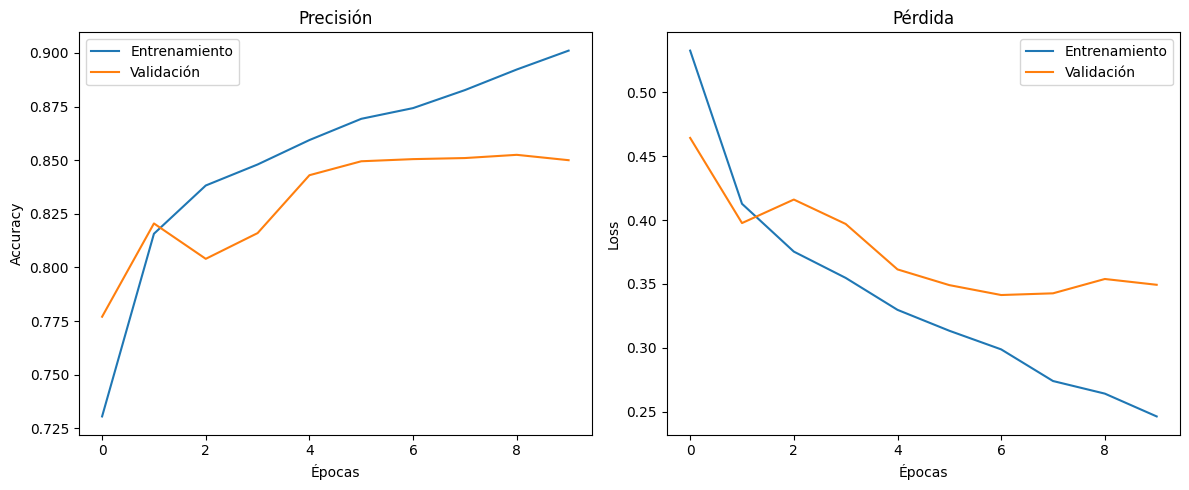

In [10]:
# Paso 5: Visualizar rendimiento del entrenamiento
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Paso 6: Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión final en test: {test_acc:.4f} | Pérdida: {test_loss:.4f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8496 - loss: 0.3508
Precisión final en test: 0.8500 | Pérdida: 0.3493


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


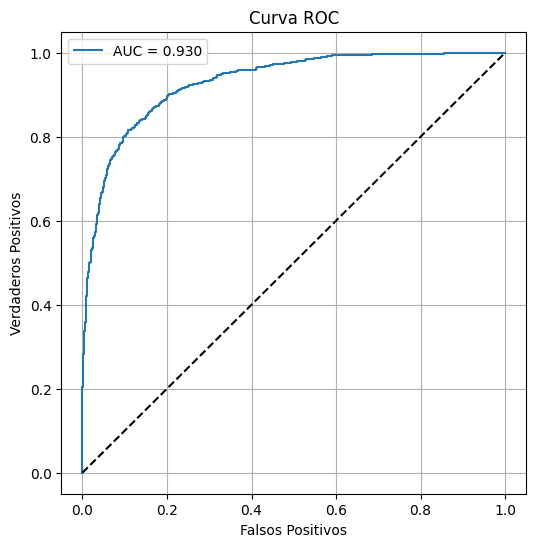

In [12]:
# Paso 7: Predicciones de probabilidad y curva ROC
y_probs = model.predict(X_test).flatten()

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


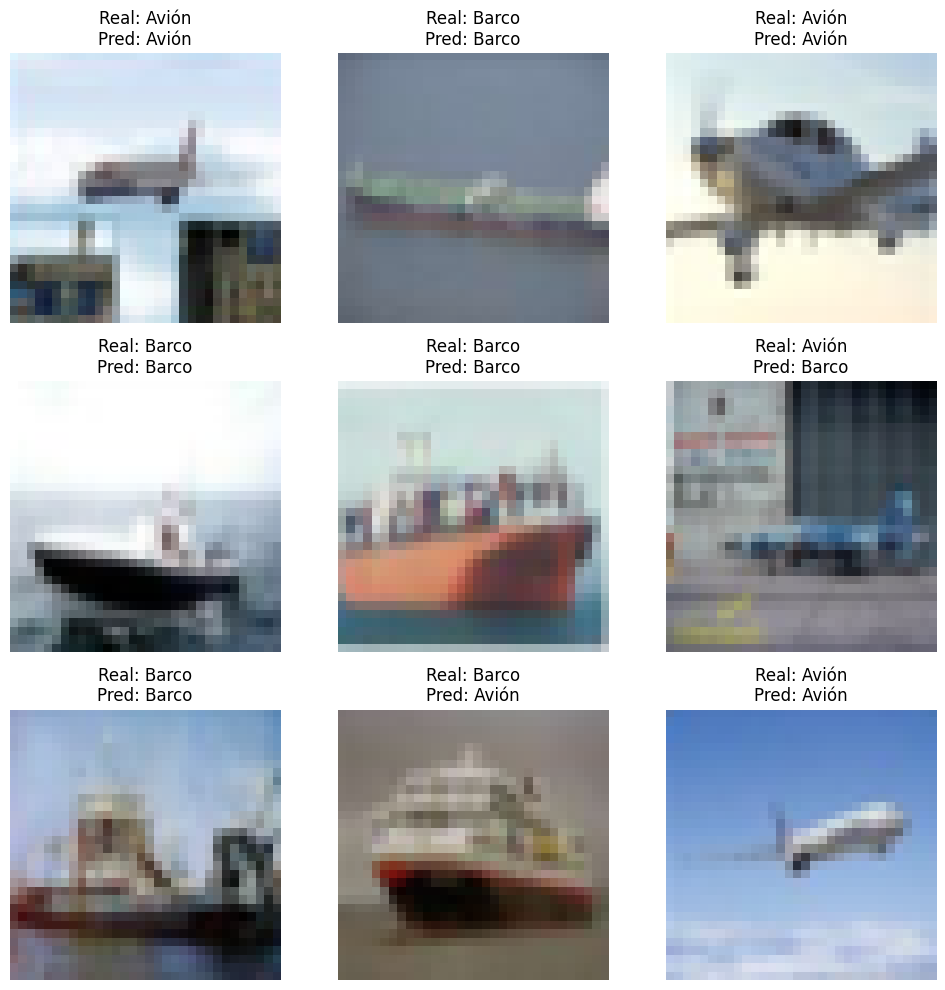

In [13]:
# Paso 8: Mostrar algunas predicciones
class_names = ['Avión', 'Barco']

# Elegimos 9 imágenes aleatorias
indices = np.random.choice(len(X_test), 9, replace=False)
images = X_test[indices]
true_labels = y_test[indices]
pred_probs = model.predict(images).flatten()
pred_labels = (pred_probs > 0.5).astype(int)

# Mostrar imágenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f'Real: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}')
plt.tight_layout()
plt.show()


RESUMEN FINAL DEL PROYECTO AJUSTADO:

* Dataset adaptado a Avión (0) y Barco (8).

* Modelo CNN simplificado y optimizado para CPU.

* Precisión final ~85%, AUC = 0.93 → ¡muy buen rendimiento!

* Visualización y validación completa paso a paso.

In [ ]:
model.save("modelo_avion_barco.keras")